In [1]:
import sys, math, os, pickle
from pathlib import Path
import numpy as np
import pandas as pd

import smfishHmrf.reader as reader
from smfishHmrf.HMRFInstance import HMRFInstance
from smfishHmrf.DatasetMatrix import DatasetMatrix, DatasetMatrixSingleField, DatasetMatrixMultiField
import smfishHmrf.visualize as visualize
import smfishHmrf.spatial as spatial

from sklearn.metrics import adjusted_rand_score

import matplotlib
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
sns.set_style("white")
# plt.rcParams['font.family'] = "Liberation Sans"
# plt.rcParams['font.size'] = 16
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['svg.fonttype'] = 'none'
%matplotlib inline
%config InlineBackend.figure_format='retina'

# from loadData import loadExpression, loadEdges, loadGeneList

ModuleNotFoundError: No module named 'smfishHmrf'

In [30]:
path2dataset = Path('/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/data/' \
'synthetic_metagene_free_cortex/500_cells_100_genes_low_variance_low_covariance_random_seed_5')
neighbor_suffix = None
expression_suffix = None
repli_list = ['0']

print(neighbor_suffix)
print(expression_suffix)
if neighbor_suffix is None: neighbor_suffix = ''
else: neighbor_suffix = '_' + neighbor_suffix
if expression_suffix is None: expression_suffix = ''
else: expression_suffix = '_' + expression_suffix

# read input files
expr = []
coor = []
genes = None
y_truth = []
for i in repli_list:
    for s in ['txt', 'tsv', 'pkl', 'pickle']:
        path2file = path2dataset / 'files' / f'expression_{i}{expression_suffix}.{s}'
        if not path2file.exists(): continue
        expr.append(loadExpression(path2file))
    genes_ = loadGeneList(path2dataset / 'files' / f'genes_{i}{expression_suffix}.txt')
    genes_ = np.array(list(map(str, genes_)), dtype=object)
    if genes is None: genes = genes_
    else: assert (genes == genes_).all()
    coor.append(loadExpression(path2dataset / 'files' / f'coordinates_{i}.txt'))
    with open(path2dataset / 'files' / 'labels_0.txt', 'r') as f:
        y_truth.append(np.array(f.read().strip().split('\n'), dtype=object))
assert len(expr) == len(repli_list)
Ns, Gs = zip(*map(np.shape, expr))
GG = max(Gs)
Es = [
    loadEdges(path2dataset / 'files' / f'neighborhood_{i}{neighbor_suffix}.txt', N)
    for i, N in zip(repli_list, Ns)
]
offsets = np.concatenate([[0], np.cumsum(Ns)])
expr = np.concatenate(expr, axis=0)
edges = [[v+o for v in e] for E, o in zip(Es, offsets) for e in E]
coor = np.concatenate(coor, axis=0)
FOV_list = np.array(sum(([i]*N for i, N in enumerate(Ns)), []))
y_truth = np.concatenate(y_truth)

None
None


In [31]:
this_dset = DatasetMatrixSingleField(expr.T, genes.tolist(), None, coor)
this_dset.adjacent = {u: set(e) for u, e in enumerate(edges)}
this_dset.edges = [(u, v) for u, e in enumerate(edges) for v in e if u < v]
this_dset.blocks = FOV_list

# read the HMRF genes (69-gene). Then subset the data to these genes.
# new_genes = genes
# new_dset = this_dset.subset_genes(new_genes.tolist())

In [32]:
# outdir = f'{path2dataset}/HMRF'
outdir = f'simulation_sample'
os.makedirs(outdir, exist_ok=True)

# This runs HMRF for a fixed K, multiple beta settings.
# K=9, beta=(0,0.5,30) which means start_beta=0, beta_incr=0.5, num_betas_to_run=30. 
K = 12
this_hmrf = HMRFInstance("simulation", outdir, this_dset, K, (0, 5, 5), tolerance=1e-20)
this_hmrf.init(nstart=1000, seed=-1)
this_hmrf.run()

Adjacency
Edges



Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: pracma
Loading required package: Matrix

Attaching package: ‘Matrix’

The following objects are masked from ‘package:pracma’:

    expm, lu, tril, triu

Loading required package: mvtnorm


[1] "Loaded smfishHmrf"
[1] 1.234092e-06
[1] 1.234092e-06
[1] 1.234092e-06
[1] 1.234092e-06
[1] 1.234092e-06
[1] 1.234092e-06
[1] 1.234092e-06
[1] 1.234092e-06
[1] 1.234092e-06
[1] 1.234092e-06
[1] 1.234092e-06
[1] 1.234092e-06
[1] "dampen factor 0.44112273357299"
[1] "dampen factor 0.536187439675054"
[1] "dampen factor 0.362912764597459"
[1] "dampen factor 0.486337813764221"
[1] "dampen factor 0.44112273357299"
[1] "dampen factor 0.362912764597459"
[1] "dampen factor 0.486337813764221"
[1] "dampen factor 0.463178870251639"
[1] "dampen factor 0.510654704452432"
[1] "dampen factor 0.463178870251639"
[1] "dampen factor 0.329172575598602"
[1] "dampen factor 0.510654704452432"
[1] "0.000"
Iteration 1: relative error of mean = 0.03; covariance = 0.1
Iteration 2: relative error of mean = 0.02; covariance = 0.06
Iteration 3: relative error of mean = 0.02; covariance = 0.04
Iteration 4: relative error of mean = 0.02; covariance = 0.03
Iteration 5: relative error of mean = 0.02; covariance = 0.

Iteration 16: relative error of mean = 0.003; covariance = 0.01
Iteration 17: relative error of mean = 5e-05; covariance = 1e-04
Iteration 18: relative error of mean = 1e-05; covariance = 4e-05
Iteration 19: relative error of mean = 3e-06; covariance = 9e-06
Iteration 20: relative error of mean = 9e-07; covariance = 3e-06
Iteration 21: relative error of mean = 3e-07; covariance = 9e-07
Iteration 22: relative error of mean = 8e-08; covariance = 4e-07
Iteration 23: relative error of mean = 3e-08; covariance = 2e-07
Iteration 24: relative error of mean = 1e-08; covariance = 7e-08
[1] "15.000"
Iteration 1: relative error of mean = 0.03; covariance = 0.2
Iteration 2: relative error of mean = 0.05; covariance = 0.3
Iteration 3: relative error of mean = 0.05; covariance = 0.3
Iteration 4: relative error of mean = 0.06; covariance = 0.2
Iteration 5: relative error of mean = 0.06; covariance = 0.2
Iteration 6: relative error of mean = 0.01; covariance = 0.05
Iteration 7: relative error of mean 

In [33]:
this_hmrf.domain.keys()

dict_keys([(12, 0), (12, 5), (12, 10), (12, 15), (12, 20)])

In [34]:
for key, y in this_hmrf.domain.items():
    print(key, adjusted_rand_score(y_truth, y))

(12, 0) 0.3757277937245423
(12, 5) 0.33512640245799347
(12, 10) 0.302619662812559
(12, 15) 0.27669443510751957
(12, 20) 0.3300958292389545


In [35]:
# visualize the results with K=12 and beta=5
y = this_hmrf.domain[(12, 5)]
y = [f'c{_}' for _ in y]

<AxesSubplot:>

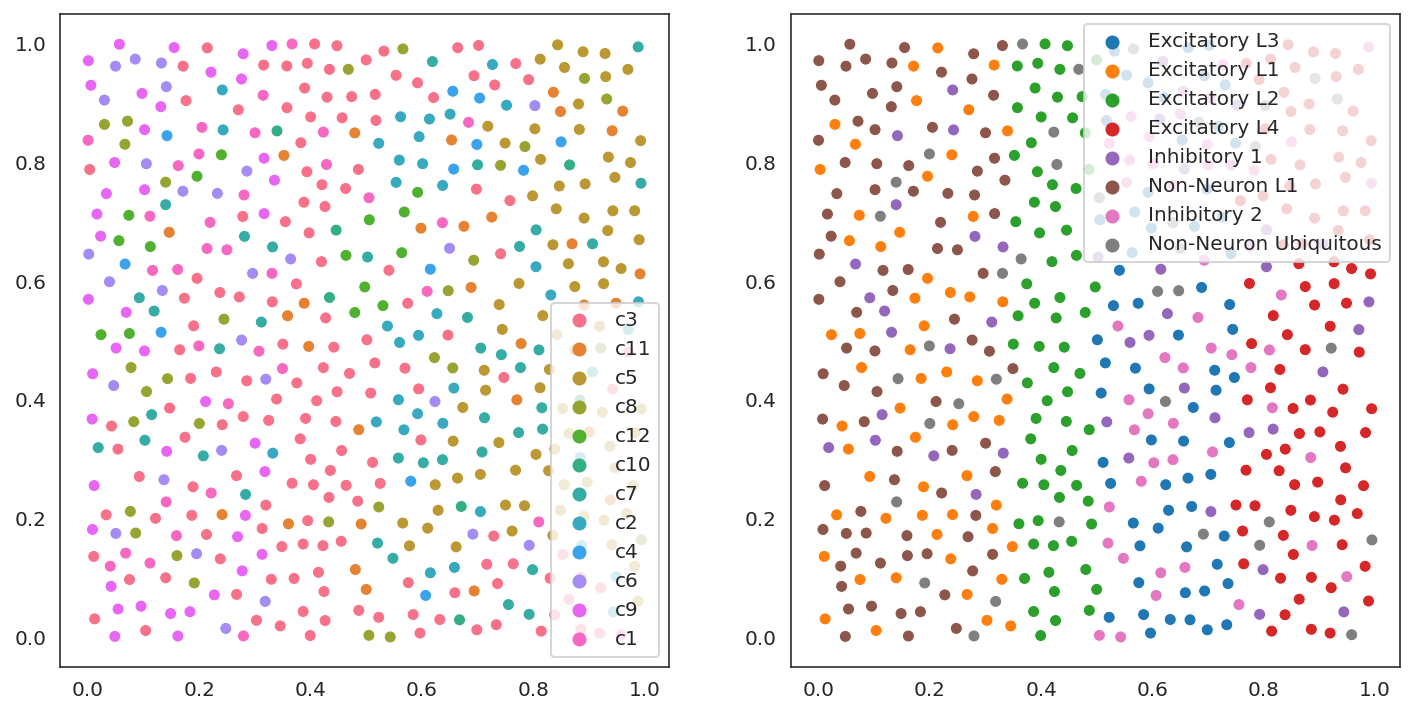

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.scatterplot(x=coor[:, 0], y=coor[:, 1], hue=y, ax=axes[0])
sns.scatterplot(x=coor[:, 0], y=coor[:, 1], hue=y_truth, ax=axes[1])